# Numerisk løsning av differensialligninger
La oss se på følgende differensialligning 
$$ \frac{\mathrm{d}x(t)}{\mathrm{d}t} = f(t,x(t)) \tag{1} $$
hvor $x = x(t)$ er en skalar funksjon av den skalare variabelen $t$.
Vi kan for eksempel tenke på $x$ som en størrelse som varierer med tiden $t$.
For å være kortfattet bruker vi notasjonen $x'(t)$ for $\frac{\mathrm{d}x(t)}{\mathrm{d}t}$.

Gitt startverdien (initialverdien) $x(0) = x_0$ og en tid $T > 0$ vil vi finne verdien av $x$ ved tiden $T$, $x(T)$.
Noen ganger kan man løse differensialligningen (1) eksakt, det vil si integrerer den og finne et endelig uttrykk for $x(t)$.
I de fleste tilfeller er ikke dette mulig, og vi er nødt til å nøye oss med en tilnærming av løsningen.

## Eulers metode
Én måte å tilnærme løsninger av (1) på er Eulers metode, som er basert på foroverdifferansen som vi allerede har sett.
Vi begynner med en partisjon $\{t_n\}_{n=0}^{N}$ av intervallet $[0,T]$, hvor vi for enkelhets skyld velger en jevn oppdeling med $h = T/N$ sånn at $t_n = n h$.
Idéen er da at ved $t=t_n$ er forhåpentlig foroverdifferansen en god tilnærming av den deriverte $x'(t_n)$, det vil si,

$$ \frac{x(t_n+h)-x(t_n)}{h} \approx f(t_n,x(t_n)). $$

Dersom $x(t_n)$ er kjent, kan vi med sammenhengen ovenfor finne en tilnærming av $x(t_{n+1}) = x(t_n+h)$. På denne måten kan vi fortsette inntil vi har en tilnærming av $x(T) = x(t_N)$.

For $t_0 = 0$ har vi $x(t_0) = x_0$, den eksakte verdien, men for alle andre $t_n$ vil vi bare ha tilnærminger av $x(t_n)$, og vi kaller disse tilnærmingene $x_n$.

> **Eulers metode**: Vi ser på differensialligningen (1) med startverdi $x(0) = x_0$. For en gitt steglengde $h > 0$ og $t_n = n h$, så er tilnærmingen av $x(t_{n+1})$ med Eulers metode gitt av
$$ x_{n+1} = x_n + h f(t_n, x_n), \quad n = 0, 1, \dots $$

### Eksempel:
Vi ser på differensialligningen
$$ x'(t) = \lambda x(t) \tag{2} $$
for en reell konstant $\lambda$ og startverdi $x(0) = x_0$, og vil finne løsningen for $t = T > 0$. Vi setter $h = T/N$ og $t_n = n h$ for $n \in \{0,\dots,N\}$.
Eulers metode gir oss at tilnærmingen $x_n$ oppfyller

$$ x_{n} = x_{n-1} + h\lambda x_{n-1} = (1+h \lambda)x_{n-1} = (1+h \lambda)^2 x_{n-2} = \dots = (1+h \lambda)^n x_0, $$

og $x_N$ er tilnærmingen av $x(T)$. Dersom vi lar steglengden $h > 0$ gå mot null, altså $h \to 0$, forventer vi at Eulers metode gir oss det eksakte svaret.
Siden $T > 0$ er fast, vil $h \to 0$ tilsvare å la antall det totale antallet steg $N$ gå mot uendelig, altså $N \to \infty$.

For eksponensialfunksjonen har vi en nokså kjent grenseverdi som sier at for ethvert reelt tall $a$ har vi
$$ \lim\limits_{n\to\infty} \left(1 + \frac{a}{n}\right)^n = e^a.$$

Vi setter $a = h c$ ovenfor og finner da at grenseverdien av tilnærmingene våre er $\lim\limits_{N\to\infty}x_N = x_0 e^{c T}$, som er den eksakte løsningen av ligningen ved tid $t=T$.

> **Merk** ***Ta med dette (nevne implisitte metoder) ?***: For enkelte ligninger, kjent som stive ligninger, er man nødt til å bruke veldig små steg $h$ for å få en rimelig tilnærming av løsningen.
Ligningen (2) er en modelligning for dette fenomenet, og her kan man til og med betrakte en kompleks konstant $\lambda$.
Dersom den reelle delen av $\lambda$ er mindre enn 0, det vil si $\mathrm{Re}(\lambda) < 0$, vil løsningen $x_0 e^{c t}$ gå mot 0 når $t \to \infty$.
For at vi også skal ha at tilnærmingene $x_n$ gitt av Eulers metode skal gå mot 0 når $n \to \infty$ må vi ha at $|1+h\lambda| < 1$, som betyr at $-2 < h \mathrm{Re}(\lambda) < 0$.
Dersom $\lambda$ er reell og negativ må vi altså velge $h < -2/\lambda$ for at dette er oppfylt. Prøv å velge $\lambda$ negativ og med stor absoluttverdi i forhold til steglengden $h$ i koden nedenfor, og se hva som skjer. 

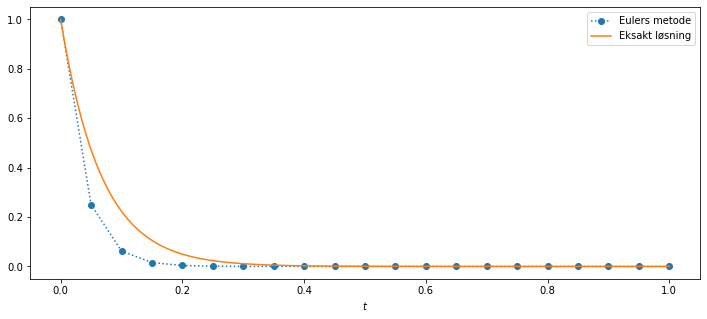

In [70]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

T = 1.0 # 
N = 20 # antall steg
x0 = 1 # startverdi
lam = -15.0 # lambda

h = T/N # steglengde

tn = np.linspace(0,T,N+1)


xn = np.zeros(N+1)
xn[0] = x0

for k in range(0,N):
    xn[k+1] = xn[k] + lam*h*xn[k]
    
plt.figure(figsize=(12,5))
plt.plot(tn,xn,':o')
plt.xlabel('$t$')

tm = np.linspace(0,T,301) # jevnt fordelte punkter for plott av eksakt løsning
plt.plot(tm,np.exp(c*tm)) # eksakt løsning
plt.legend(["Eulers metode","Eksakt løsning"])

## Eulers metode for systemer av differensialligninger
Tidligere så vi på differensialligninger hvor den ukjente var en skalar størrelse, men ofte har man at den ukjente, og dermed også høyresiden, er en vektor.
Vi kan skrive

$$ \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \quad \text{og} \quad \mathbf{f} = \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_m \end{bmatrix} $$

slik at disse er $m$-dimensjonale vektorer, og hvor hver komponent $f_i$ av $\mathbf{f}$ kan avhenge av alle komponentene i $\mathbf{x}$. Den tilhørende differensialligningen blir da
$$ \mathbf{x}'(t) = \mathbf{f}(\mathbf{x}(t)), \tag{3}$$
hvor $\mathbf{x}'$ betyr at man deriverer hver komponent.

Vi kan like godt bruke Eulers metode i dette tilfellet også. La $\mathbf{x}(0) = \mathbf{x}_0$ være startverdien ved $t=0$, $t_n = n h$ for en steglengde $h>0$.
Helt analogt med det skalare tilfellet kan vi da definere tilnærmingen $\mathbf{x}_n$ av $\mathbf{x}(t_n)$ som

$$ \mathbf{x}_{n+1} = \mathbf{x}_n + h \mathbf{f}(\mathbf{x}_n), \quad n=0,1,\dots $$

I dette kurset begrenser vi oss til å se på lineære systemer på formen $\mathbf{f}(\mathbf{x}) = A\mathbf{x}$, hvor $A$ er en $m\times m$-matrise.
Da vil ligning (3) tilsvare 
$$ \mathbf{x}'(t) = A \mathbf{x}(t) \tag{4}$$
og den tilhørende Eulers metode blir
$$ \mathbf{x}_{n+1} = \mathbf{x}_n + h A \mathbf{x}_n, \quad n=0,1,\dots $$

## Omskriving av andreordens differensialligninger
En andreordens lineær og homogen differensialligning er av formen
$$ x''(t) + b x'(t) + c x(t) = 0 $$
for en ukjent $x(t)$.
Disse kan løses eksakt, men her skal vi vise hvordan de kan skrives om til et førsteordens lineært system av differensialligninger.
Dette kan gjøres ved å innføre variabelen $y(t) = x'(t)$, slik at ligningen ovenfor er ekvivalent til
$$ \begin{align} x'(t) &= y(t) \\ y'(t) &= -c x(t) - b y(t) \end{align} \quad \iff \quad \begin{bmatrix} x'(t) \\ y'(t) \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -c & -b \end{bmatrix} \begin{bmatrix} x(t) \\ y(t) \end{bmatrix}, $$
som er nøyaktig på formen til ligning (4).

### Eksempel: en ideell pendel
En idealisert pendel (en punktmasse opphengt i en masseløs stang) kan beskrives av differensialligningen
$$ \theta'' + \frac{g}{L}\sin(\theta) = 0 \tag{5} $$
hvor $\theta = \theta(t)$ er vinkelutslaget ved tid $t$, $\theta = 0$ betyr at pendelen henger rett ned.
Videre er $g$ gravitasjonskonstanten og $L$ er lengden av pendelen.
Dette er en andreordens *ikkelineær* differensialligning, som vi ikke kan løse eksakt.
Det er derimot ikke vanskelig å tilnærme løsningen med Eulers metode, og et av hovedgrunnene for å lære numeriske metoder er jo nettopp å kunne tilnærmet løse ligninger som ikke kan løses eksakt.

Men for små utslag $\theta$ har vi at $\sin(\theta) \approx \theta$, sånn at en tilnærming av denne ligningen er
$$ \theta'' + \omega^2 \theta = 0 \tag{6} $$
hvor vi har introdusert $\omega = \sqrt{g/L}$ siden både $g$ og $L$ er positive størrelser.
Dette er derimot en lineær annenordens differensialligning, og den eksakte løsningen vil vil være en lineærkombinasjon av de trigonometriske funksjonene $\sin(\omega t)$ og $\cos(\omega t)$.

Med fare for å motsi oss selv fra tidligere, la oss sammenligne Eulers metode for (5) med den eksakte løsningen gitt av tilnærmingen (6).
La oss velge $\omega = 1$, startvinkelen $\theta(0) = \theta_0 = 0$ og start-vinkelhastigheten $\theta'(0) = \theta'_0 = 1$.
Vi finner da at den forenklede ligningen (6) har løsning $ \theta(t) = \sin(t) $.

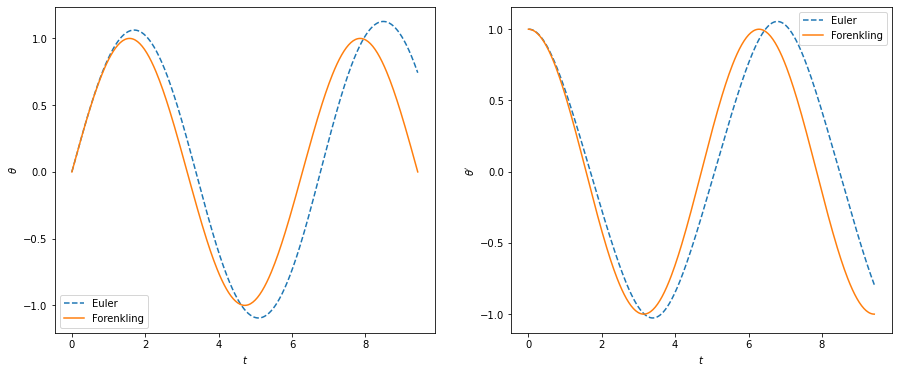

In [224]:
omega = 1 # omega
theta0 = 0 # startvinkel
dtheta0 = 1 #start-vinkelhastighet

T = 3*np.pi
N = 500
h = T/N
tn = np.linspace(0,T,N+1)

def Y(t): # eksakt løsnong av forenklet ligning
    return theta0*np.cos(omega*t) + (dtheta0/omega)*np.sin(omega*t)

def dY(t): # den deriverte av funksjonen ovenfor
    return -omega*theta0*np.sin(omega*t) + dtheta0*np.cos(omega*t)

Xn = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Xn[0,0] = theta0
Xn[0,1] = dtheta0

for k in range(0,N): # N steg med Eulers metode for opphavelig ligning
    Xn[k+1,0] = Xn[k,0] + h*Xn[k,1]
    Xn[k+1,1] = Xn[k,1] - h*(omega**2)*np.sin(Xn[k,0])

tm = np.linspace(0,T,301)

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.plot(tn, Xn[:,0],'--')
ax1.plot(tm,Y(tm))
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$\theta$')
ax1.legend(['Euler','Forenkling'])

ax2.plot(tn,Xn[:,1],'--')
ax2.plot(tm,dY(tm))
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r"$\theta'$")
ax2.legend(['Euler','Forenkling'])



Vi ser her at vi har periodisk oppførsel for både tilnærmingen gitt av Eulers metode, og (selvfølgelig) for sinusbevegelsen til det forenklede systemet.
Dessuten indikerer tilnærmingen vi får med Eulers metode at perioden til det opphavelige systemet er lenger enn for det tilnærmede systemet.

Den periodiske oppførselen indikerer at ingen energi går tapt for dette systemet. En mer naturtro modell ville tatt hensyn til friksjon, som til ville fått pendelen til å svinge med stadig mindre utslag til den til slutt henger i ro.
Apropos energi, vi kan legge merke til at utslagene for tilnærmingen med Eulers metode blir gradivis litt større.
Dette er en bieffekt av Eulers metode, den eksakte løsingen skal ha like store utslag hver gang.
Man kan redusere denne økningen litt ved å velge en mindre steglengde $h$, men den vil alltid være der: på denne måten legger Eulers metode til energi som ikke er der.
Dette kan man også se ved å plotte $\theta$ og $\theta'$ mot hverandre: da skal man her engentlig få en lukket kurve (sirkel) her, som svarer til en bestemt mengde energi, men Eulers metode vil gi oss en spiral som går utover (til høyere energinivåer). ***Si mer om faseportretter? Implisitt Euler?***

**Merk**: Siden den forenklede ligningen ble utledet ved å anta små vinkelutslag er det en type oppførsel den ikke kan gi oss, og det er når pendelen har så stor energi at den roterer hele veien rundt istedenfor så svinge frem og tilbake. Prøv å doble start-vinkelhastigheten i koden ovenfor og se hva som skjer.



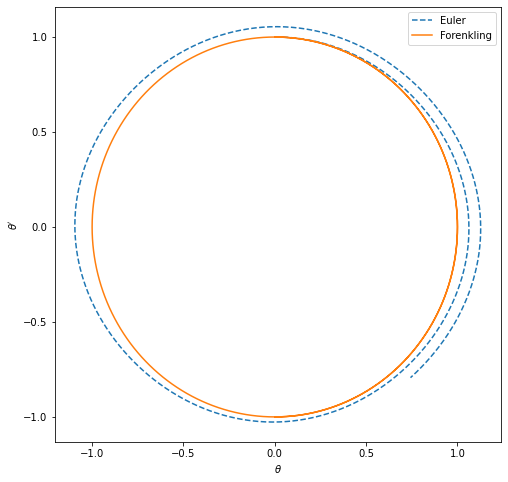

In [225]:
plt.figure(figsize=(8,8))
plt.plot(Xn[:,0],Xn[:,1],'--')
plt.plot(Y(tm),dY(tm))
plt.xlabel(r'$\theta$')
plt.ylabel(r"$\theta'$")
plt.legend(['Euler','Forenkling'])